# Principal Component Analysis Exercises

Classification Data set

https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset

In [143]:
# Import the necessary libraries
# Pandas, Numpy, Seaborn, plotly, matplotlib
# SKLearn - MinMaxScaler, PCA
# Optionally - LogisiticRegression, KMeans

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix





# Type your code above this line

In [144]:
# Let's create a dataframe for the customer_data.csv file and drop the 'id' column

df = pd.read_csv('customer_data.csv')
df.head()


# Type your code above this line

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [145]:
# What is the size of the dataframe

df.info()


# Type your code above this line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [147]:
df['fea_2'].head(40)

0     1245.5
1     1277.0
2     1298.0
3     1335.5
4        NaN
5     1217.0
6     1304.0
7     1256.0
8     1323.5
9        NaN
10    1314.5
11    1250.0
12    1223.0
13       NaN
14    1365.5
15    1257.5
16    1214.0
17    1241.0
18    1241.0
19       NaN
20       NaN
21    1305.5
22    1277.0
23    1304.0
24    1320.5
25    1290.5
26       NaN
27    1455.5
28    1242.5
29    1239.5
30    1335.5
31    1355.0
32       NaN
33    1338.5
34    1259.0
35    1364.0
36       NaN
37    1335.5
38    1272.5
39    1347.5
Name: fea_2, dtype: float64

In [148]:
# Fix any Nan Values with the interpolate method

df['fea_2'] = df['fea_2'].interpolate(method='pad')



# Type your code above this line

In [149]:
df['fea_2'].head(40)

0     1245.5
1     1277.0
2     1298.0
3     1335.5
4     1335.5
5     1217.0
6     1304.0
7     1256.0
8     1323.5
9     1323.5
10    1314.5
11    1250.0
12    1223.0
13    1223.0
14    1365.5
15    1257.5
16    1214.0
17    1241.0
18    1241.0
19    1241.0
20    1241.0
21    1305.5
22    1277.0
23    1304.0
24    1320.5
25    1290.5
26    1290.5
27    1455.5
28    1242.5
29    1239.5
30    1335.5
31    1355.0
32    1355.0
33    1338.5
34    1259.0
35    1364.0
36    1364.0
37    1335.5
38    1272.5
39    1347.5
Name: fea_2, dtype: float64

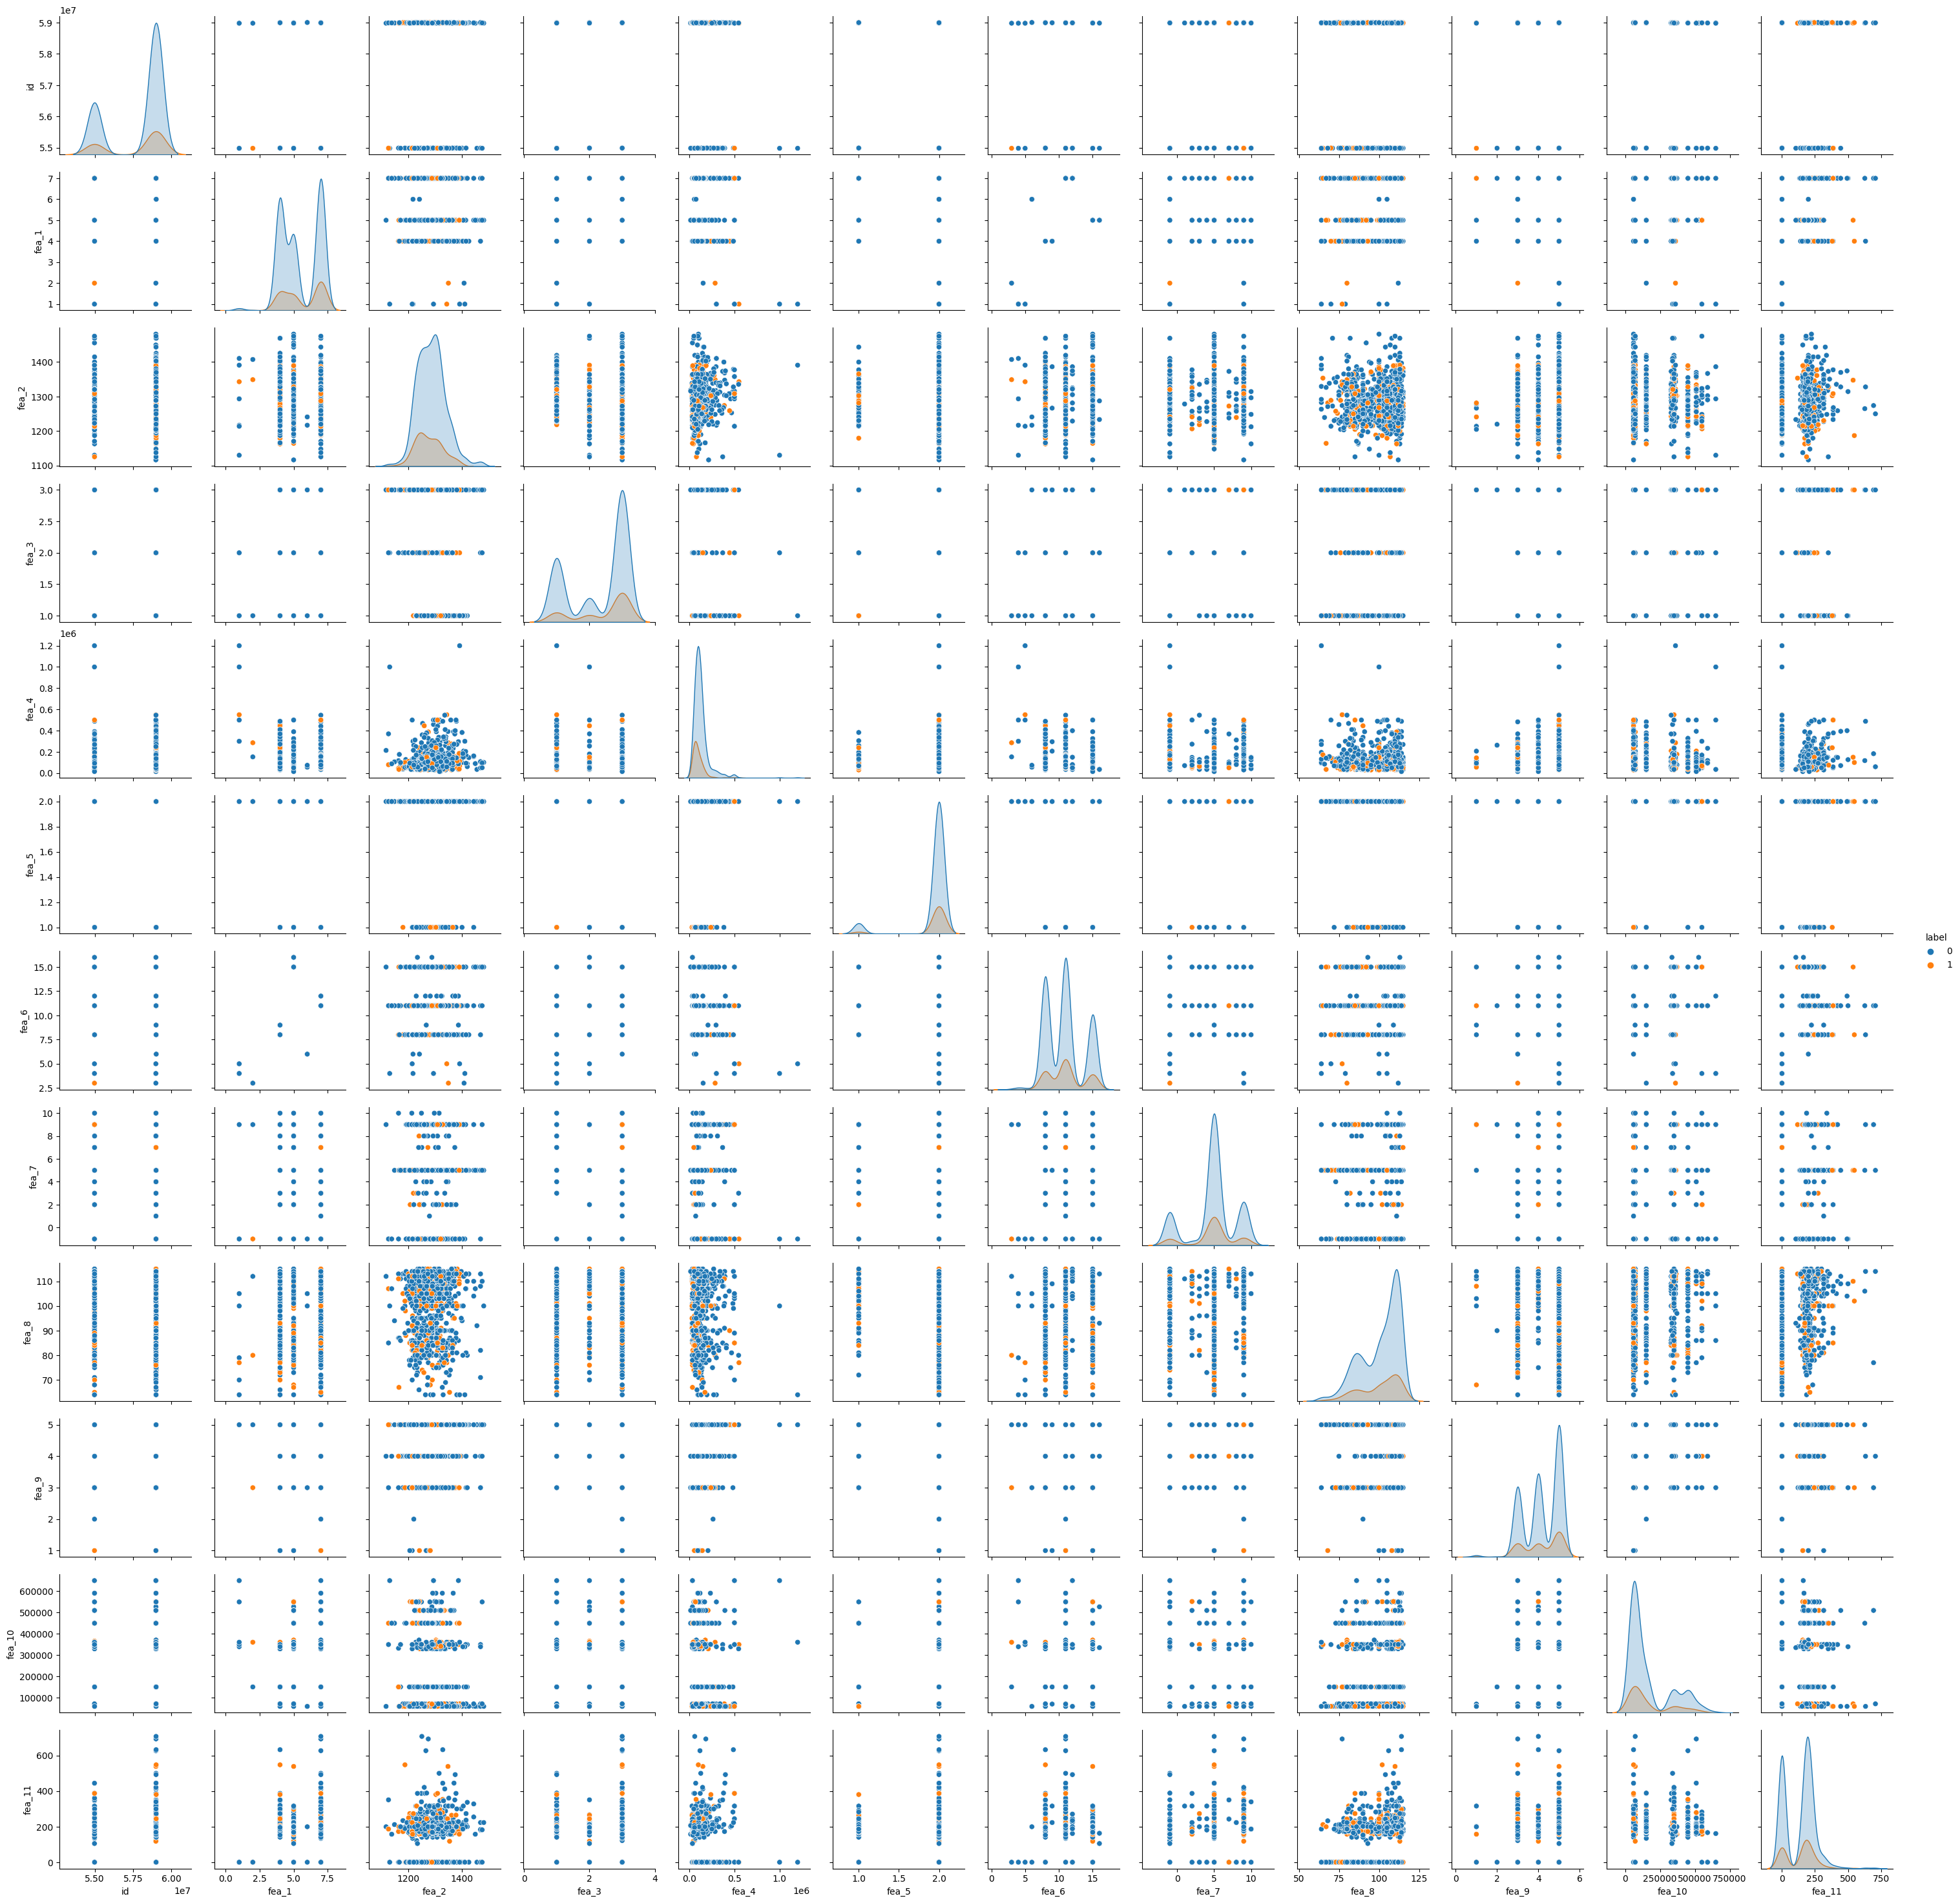

In [152]:
# Create a Pair Plot of the dataframe with the label as the hue

sns.pairplot(df, hue='label')



# Type your code above this line

In [155]:
# Create an X value and apply minmaxScaler to the X values


X = df[df.columns[2:]]

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()









# Type your code above this line

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.00,0.154727,0.345485
1,0.500000,0.440329,0.0,0.082700,1.0,0.384615,0.000000,0.705882,0.50,0.477501,0.291987
2,1.000000,0.497942,0.0,0.080169,1.0,0.615385,0.000000,0.725490,1.00,0.020338,0.000000
3,1.000000,0.600823,0.0,0.114768,1.0,0.615385,0.545455,0.901961,0.50,0.000142,0.000000
4,1.000000,0.600823,0.5,0.037131,1.0,0.615385,0.545455,0.862745,0.75,0.661076,0.278149


In [167]:
# Instantiate our PCA component and fit our model, start with 5 components

model = PCA(n_components=5)
model.fit(X)




# Type your code above this line

PCA(n_components=5)

In [159]:
# What are the feature names in the model created?


model.feature_names_in_

# Type your code above this line

array(['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7',
       'fea_8', 'fea_9', 'fea_10', 'fea_11'], dtype=object)

In [160]:
# What are the components of the model?


model.components_



# Type your code above this line

array([[-0.00372384,  0.07175933, -0.95667375,  0.02203572,  0.02036649,
        -0.07920198, -0.23160223, -0.0192063 , -0.071815  ,  0.11332548,
        -0.02074156],
       [ 0.32328965, -0.04046676,  0.15132589, -0.00937543,  0.21208439,
         0.35960627, -0.43718719,  0.12846064, -0.0084694 ,  0.6808148 ,
         0.15920757],
       [-0.34398734, -0.04293512,  0.15626213,  0.03541799,  0.05955112,
        -0.17488005, -0.65019821, -0.542185  ,  0.27584389, -0.07734861,
        -0.14571438],
       [ 0.21968566,  0.0091564 ,  0.01668214, -0.01460155, -0.94217944,
         0.07284344, -0.20634624, -0.01929043,  0.05040778, -0.0071568 ,
         0.11230116],
       [-0.61216771, -0.04901196,  0.09563994,  0.01133522, -0.14650273,
        -0.37630185, -0.1524878 ,  0.55750302, -0.16082303,  0.28038125,
         0.1093941 ]])

In [161]:
# Create a dataframe from the model components

df_comp  = pd.DataFrame(model.components_, columns=model.feature_names_in_)

df_comp.head()





# Type your code above this line

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,-0.003724,0.071759,-0.956674,0.022036,0.020366,-0.079202,-0.231602,-0.019206,-0.071815,0.113325,-0.020742
1,0.323290,-0.040467,0.151326,-0.009375,0.212084,0.359606,-0.437187,0.128461,-0.008469,0.680815,0.159208
2,-0.343987,-0.042935,0.156262,0.035418,0.059551,-0.174880,-0.650198,-0.542185,0.275844,-0.077349,-0.145714
3,0.219686,0.009156,0.016682,-0.014602,-0.942179,0.072843,-0.206346,-0.019290,0.050408,-0.007157,0.112301
4,-0.612168,-0.049012,0.095640,0.011335,-0.146503,-0.376302,-0.152488,0.557503,-0.160823,0.280381,0.109394


<AxesSubplot:>

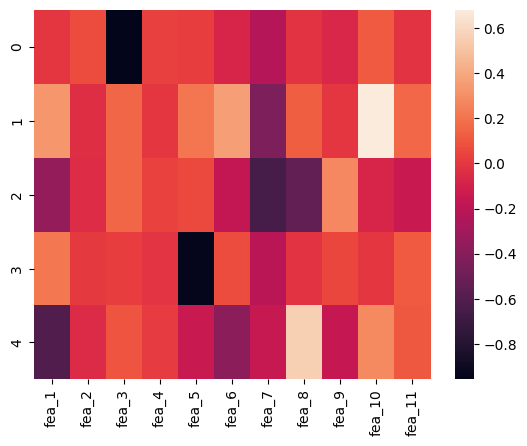

In [162]:
# Create an SNS Heatmap for these components and get an idea of where they came from

sns.heatmap(df_comp)


# Type your code above this line

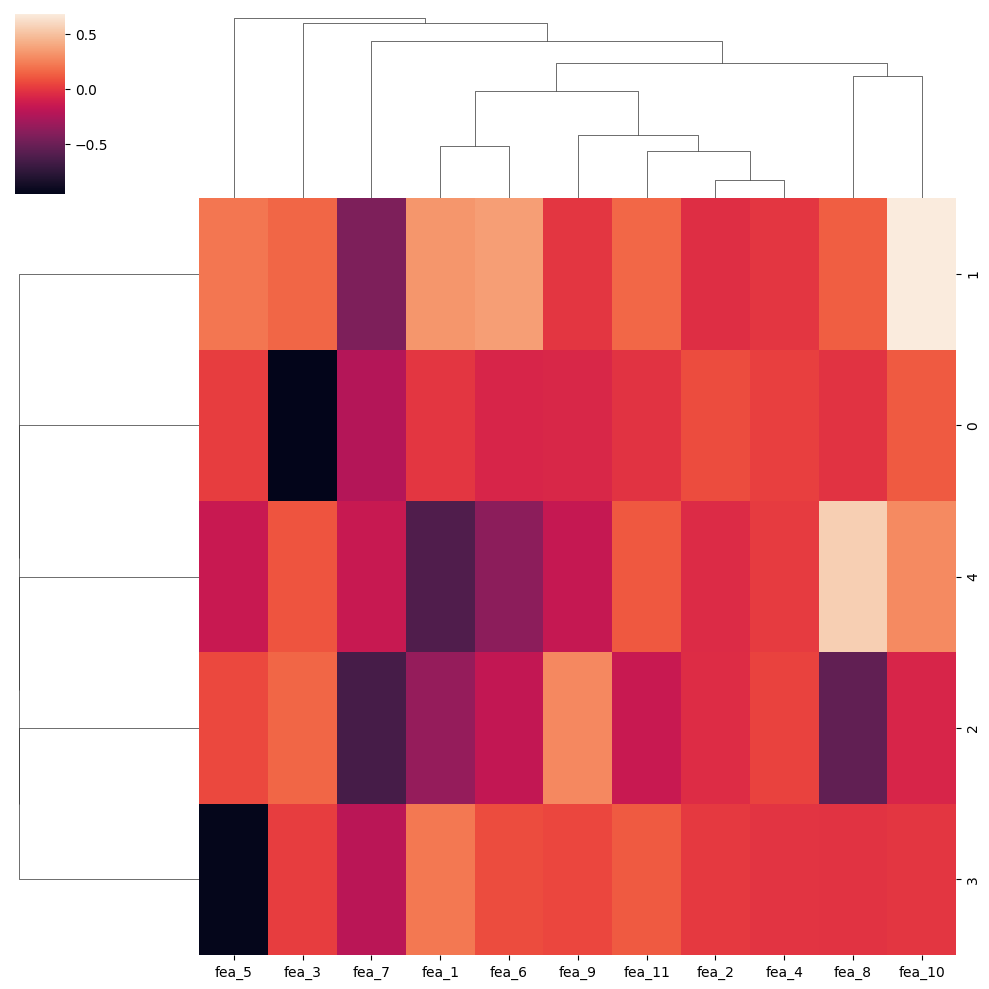

In [163]:
# Create a Cluster map to see what components might actually have a relationship


sns.clustermap(df_comp)


# Type your code above this line

<AxesSubplot:>

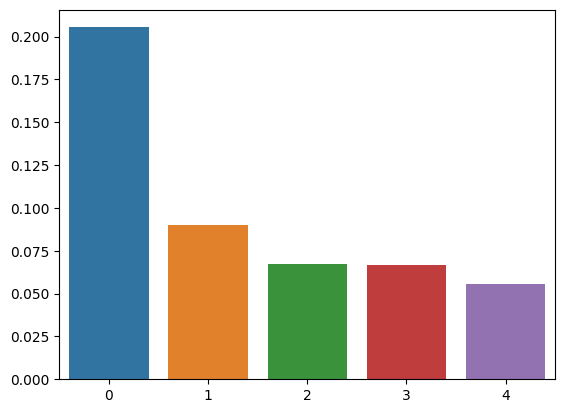

In [168]:
# Plot the Model explained variance in a bar plot
# How many features are important in this dataset?


sns.barplot(x=list(range(model.n_components_)), y=model.explained_variance_)


# Type your code above this line

In [175]:
# Re-Run the PCA model with the number of components that are appropriate

# and use the transform method to get the actual data, store the data in a variable called model_output

model = PCA(n_components=2)
model_output = model.fit_transform(X)



# Type your code above this line

In [176]:
# What does the data in model output look like?

model_output



# Type your code above this line

array([[-0.37747812,  0.18002746],
       [ 0.83264778,  0.20866656],
       [ 0.73455096,  0.09154426],
       ...,
       [-0.29732452,  0.103706  ],
       [-0.33311734, -0.2628195 ],
       [-0.28494508, -0.06772114]])

In [177]:
# Create a dataframe called df_output from model_output
# Call the columns col1 and col2

df_output = pd.DataFrame(model_output, columns=['col1', 'col2'])
df_output.head()



# Type your code above this line

,col1,col2
0,-0.377478,0.180027
1,0.832648,0.208667
2,0.734551,0.091544
3,0.646597,-0.138255
4,0.218480,0.425238


In [178]:
# What is the size of df_output compared to the original df

df_output.info(), df.info()


# Type your code above this line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1125 non-null   float64
 1   col2    1125 non-null   float64
dtypes: float64(2)
memory usage: 17.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   1125 non-null   float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage:

(None, None)

###### Bonus

In [179]:
# Add the labels of the original dataframe to the df_output dataframe


df_output['label'] = df['label']
df_output.head()


# Type your code above this line

,col1,col2,label
0,-0.377478,0.180027,1
1,0.832648,0.208667,0
2,0.734551,0.091544,0
3,0.646597,-0.138255,1
4,0.218480,0.425238,0


In [180]:
# Compare between Logistic Regression with the original DataFrame and this one
# Train Test and split the data on the Original Dataframe


X = df[df.columns[2:]]
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)








# Type your code above this line

In [181]:
# Use Pipeline with LogisticRegression and MinMaxScaler
# Create the pipe, fit, predict and evaluate the pipe results


pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('lr', LogisticRegression(max_iter=1500))
], verbose=True)

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))








# Type your code above this line

[Pipeline] ............... (step 1 of 2) Processing mms, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[[263   0]
 [ 75   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       263
           1       0.00      0.00      0.00        75

    accuracy                           0.78       338
   macro avg       0.39      0.50      0.44       338
weighted avg       0.61      0.78      0.68       338



/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [182]:
# Train Test and split the data on the df_output

X = df_output[['col1', 'col2']]
y = df_output['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)






# Type your code above this line

In [183]:
# Use Pipeline with LogisticRegression and MinMaxScaler
# Create the pipe, fit, predict and evaluate the pipe results


pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('lr', LogisticRegression(max_iter=1500))
], verbose=True)

pipe.fit(X_train, y_train)

pred_df_output = pipe.predict(X_test)

print(confusion_matrix(y_test, pred_df_output))
print(classification_report(y_test, pred_df_output))



# Type your code above this line

[Pipeline] ............... (step 1 of 2) Processing mms, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[[263   0]
 [ 75   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       263
           1       0.00      0.00      0.00        75

    accuracy                           0.78       338
   macro avg       0.39      0.50      0.44       338
weighted avg       0.61      0.78      0.68       338



/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [185]:
# Compare with KMeans
# Create an X value from df_output
# No y value needed


X = df_output[['col1', 'col2']]




# Type your code above this line

In [186]:
# Find the Ideal K value from the dataset

inertias = []

for i in range(1,40):
    model = KMeans(n_clusters=i)
    model.fit(X)
    
    inertias.append(model.inertia_)
inertias





# Type your code above this line

[331.95277536902154,
 128.8376638679311,
 84.35648677327563,
 56.26920910418043,
 40.12756737929469,
 29.471058050325567,
 24.0403650212293,
 19.508588535350214,
 16.738432922819815,
 14.19506014936994,
 12.220814779391906,
 10.369490602293805,
 9.476131326859974,
 8.706337528188207,
 8.106029111551935,
 7.647078643677659,
 7.0402673643172555,
 6.445055405370907,
 6.057341335158956,
 5.651595874239992,
 5.456355351944632,
 5.064610372983109,
 4.777912110705587,
 4.585216089790736,
 4.395117568211784,
 4.263606931773337,
 4.04772218986381,
 3.9187397416571765,
 3.8053938882499474,
 3.680117087785603,
 3.4460214147102013,
 3.3604808071442624,
 3.238634845416806,
 3.119073984801984,
 2.9696978115236874,
 2.895029359475784,
 2.8151540950658407,
 2.7582114651865988,
 2.651118627470278]

In [187]:
# Graph the output to find the best K value


px.line(x=range(1,40),  y=inertias)


# Type your code above this line

In [188]:
# Re-Run the KMeans model with the approximated K value

model = KMeans(n_clusters=5)
model.fit(X)



# Type your code above this line

KMeans(n_clusters=5)

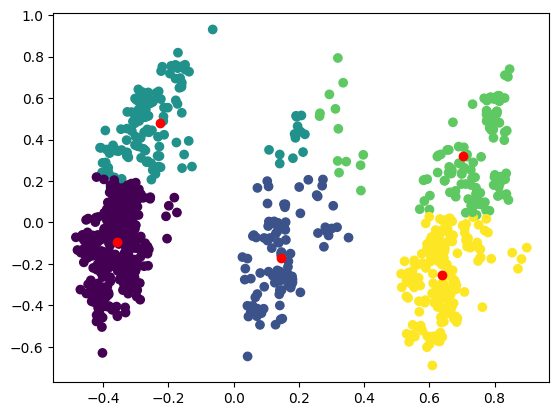

In [191]:
# Graph the data and the clusters from the model on a scatterplot

fig, ax = plt.subplots(1,1)
ax.scatter(x=df_output.loc[:, 'col1'], y=df_output.loc[:,'col2'], c=model.labels_ )
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red')


# Type your code above this line